In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Genetic Algorithm

***generate_population***: generates population of the given size and constraint<br/>
   &nbsp;&nbsp;&nbsp;&nbsp; `size`: the size of the population<br/>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`constraints`: check if the constarint functions are valid

In [2]:
def generate_population(size, constraint):
    population = []
    while len(population)!=size:
        x1 = random.uniform(0,1)
        x2 = random.uniform(0,1)
        x3 = random.uniform(0,1)
        if constraint(x1,x2,x3):
            individual = [x1,x2,x3]
            population.append(individual)

    return population

***constraints***: check the given constaraint functions

In [3]:
def constraint(x1,x2,x3): 
    condition1 =  (x1**2 + 2*(x2**2) + 3*(x3**2))<=1 
    condition2 = x1>=0 and x2>=0 and x3>=0
    return (condition1 and condition2)

***objective function***: the function we need to maximaize using genetic algorithm

In [4]:
def objective_function(individual):
    x1 = individual[0]
    x2 = individual[1]
    x3 = individual[2]
    return x1**0.5 + x2**0.5 + x3**0.5

***choice_by_roulette***: this performs selection by roulette wheel selection<br/>
&nbsp;&nbsp;&nbsp;&nbsp;`sorted_population`: population sorted by the fitness function 

In [5]:
def choice_by_roulette(sorted_population, fitness_sum):
    # get lowest fitness
    lowest_fitness = objective_function(sorted_population[0])
    # get random draw for roulette selection
    draw = random.uniform(0, 1)
    accumulated = 0
    
    #claculate the probability of ecah individual
    for individual in sorted_population:
        fitness = objective_function(individual)
        probability = fitness / fitness_sum
        accumulated += probability
        
        # if cumulative probability less than draw, the return
        if draw <= accumulated:
            return individual

In [6]:
# sort population by fitness function
def sort_population_by_fitness(population):
    return sorted(population, key=objective_function)

***crossover***: perform crossover for two parents, as our individulas are real-coded and not binary coded, we use linear crossover<br/>
`offspring = (w1*x1a + w2*x1b), (w1*x2a + w2*x2b) , (w1*x3a+w2*x3b)`

In [7]:
def crossover(individual_a, individual_b):
    
    w1 = w2 =0.5
    
    x1a = individual_a[0]
    x2a = individual_a[1]
    x3a = individual_a[2]

    x1b = individual_b[0]
    x2b = individual_b[1]
    x3b = individual_b[2]
    
    return [(w1*x1a + w2*x1b), (w1*x2a + w2*x2b) , (w1*x3a+w2*x3b)]

In [23]:
# mutate individual and check if it still follows the constraints
def mutate(individual,constraint):
    next_x1 = individual[0] + random.uniform(-0.05, 0.05)
    next_x2 = individual[1] + random.uniform(-0.05, 0.05)
    next_x3 = individual[2] + random.uniform(-0.05, 0.05)
    
#     while not constraint(next_x1,next_x2,next_x3):
#         next_x1 = individual[0] + random.uniform(-0.05, 0.05)
#         next_x2 = individual[1] + random.uniform(-0.05, 0.05)
#         next_x3 = individual[2] + random.uniform(-0.05, 0.05)

    return [ next_x1,  next_x2,  next_x3]

In [24]:
# generate the new generation from the previous generation
# perform crossover and mutation to produce offspring
def make_next_generation(previous_population):
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    population_size = len(previous_population)
    fitness_sum = sum(objective_function(individual) for individual in population)

    for i in range(population_size):
        first_choice = choice_by_roulette(sorted_by_fitness_population, fitness_sum)
        second_choice = choice_by_roulette(sorted_by_fitness_population, fitness_sum)

        individual = crossover(first_choice, second_choice)
        individual = mutate(individual,constraint)
        individual[0] = min(max(individual[0],0),0.9)
        individual[1] = min(max(individual[1],0),0.9)
        individual[2] = min(max(individual[2],0),0.9)
        next_generation.append(individual)

    return next_generation

GENERATION-1
[0.602462320422762, 0.14316886302999055, 0.21259083230305265] 1.6156368120201772
[0.19553244106707024, 0.16726359458172047, 0.2991945596011555] 1.3981560247762947
[0.6782026944620176, 0.3825473878244324, 0.08534310015724711] 1.7341701950364599
[0.5948190394400736, 0.09245538878831616, 0.26612820110601654] 1.5911860490870533
[0.7099783870089057, 0.2791174383961845, 0.08343353768461659] 1.6597664554476863
[0.5932717110318656, 0.3604955023168137, 0.3452908048243727] 1.958268613176712
[0.13697385582985355, 0.3062412087501831, 0.3387061519876987] 1.5054751056810822
[0.2513252059128196, 0.051016803860025495, 0.5247914301881997] 1.4516173476695144
[0.09560906019818038, 0.09846620338902146, 0.01757018560867818] 0.7555529739182778
[0.1671276128124971, 0.5204446655802836, 0.32535405570071674] 1.7006291068245174
[0.8737830304204424, 0.10370691827784928, 0.19764071044110443] 1.7013672124666743
[0.05044384546717673, 0.4923272544485022, 0.1240117710630747] 1.2784104796946831
[0.69343600

[0.36270157052815294, 0.3437264278730654, 0.3368966994932135] 1.7689569994219911
[0.43626503055010957, 0.32967333192189524, 0.3592249321082663] 1.8340292471361201
[0.38182703806578716, 0.3013683351785828, 0.36150667838947415] 1.7681460510283
[0.40787206459662767, 0.27844273954767595, 0.3367350657498831] 1.7466141393635657
GENERATION-16
[0.35658433929897454, 0.3284170484764531, 0.3505463778873399] 1.7622932300887522
[0.4195649172275377, 0.2784235584941676, 0.2916398888078074] 1.7154338044545723
[0.4751151949448319, 0.2910965152437686, 0.31069999663317316] 1.786224310092651
[0.40499125811539627, 0.33376571228825985, 0.237670542648739] 1.7016284926628884
[0.43566874146160933, 0.28504967172325063, 0.36792657707924964] 1.8005220226713607
[0.39908343223581483, 0.2793380550105177, 0.29737768147961885] 1.7055783838999883
[0.42594240221052404, 0.37499596054781387, 0.33805334733621234] 1.8464353197150274
[0.416409113643301, 0.25068858470259436, 0.3246357682542208] 1.715753975643075
[0.4166446805

[0.4118869369729857, 0.3267706175881398, 0.3489917021735321] 1.8041779165647003
[0.48694687871222064, 0.31156585582521606, 0.2805879090924388] 1.78570212926962
[0.35149234955070807, 0.2886810792774895, 0.34696307976768354] 1.7191941205928107
[0.4480806615922471, 0.28308774959892147, 0.2591279340836034] 1.7104942879500937
[0.42395144486587094, 0.26411559024148046, 0.27154656999779203] 1.6861386181653764
[0.4255713284917038, 0.28000938170952194, 0.3520383083423234] 1.7748455717639549
[0.45473076738341667, 0.32209195601572715, 0.30214929625860487] 1.7915498242671766
[0.38617002711609266, 0.23782779766032638, 0.3548506418237102] 1.7047951289646743
[0.48184282878733964, 0.2759243723418732, 0.26526584654028984] 1.7344736905466762
[0.4186035703399152, 0.2169474260951826, 0.34189170695752946] 1.6974870232126726
[0.441904719622457, 0.30126189379719576, 0.2906747541533456] 1.7527750491348528
[0.404131763423041, 0.2619063624050714, 0.3125595664503668] 1.706551735106736
[0.4254219598047853, 0.3552

[0.39803359167306945, 0.2414952637037096, 0.32905771811068185] 1.6959562377535318
[0.42291310972067275, 0.29915769642249623, 0.2858688690175408] 1.7319378653594146
GENERATION-32
[0.4524587074494404, 0.365026952356372, 0.32658114092600615] 1.8482978956534075
[0.45843224469021254, 0.3788960542524594, 0.34114615128864834] 1.8766987573325253
[0.4580530072905501, 0.38179698031758197, 0.30842500460977706] 1.8500536065332414
[0.45627678541505634, 0.3519382242907467, 0.3346450333190794] 1.8472115660413846
[0.36507981564908126, 0.251095885173665, 0.4147398856167398] 1.7493160545806616
[0.4286519435527955, 0.26327529189406224, 0.37465807606113266] 1.7799119423325087
[0.32700438011970934, 0.31069003420827673, 0.38000987718271284] 1.7456881406032245
[0.3960709593387381, 0.34967294959796336, 0.3979588700756292] 1.8515130062670748
[0.3776721674956091, 0.2443437775282185, 0.4094864234312856] 1.748773058033747
[0.4242948202888962, 0.3565038621254183, 0.29664882135137766] 1.7931133841975282
[0.42822494

[0.4397071884808429, 0.3366732790450748, 0.3475871661937536] 1.8329049788016352
[0.4637863171730788, 0.2541163955227342, 0.37384573786652214] 1.7965474351410595
GENERATION-44
[0.43465995794417067, 0.27296450658150134, 0.4142473973969535] 1.8253680532750878
[0.4267362830118497, 0.22033483670380552, 0.3793902899286251] 1.738595590474028
[0.451592848554776, 0.32088688961625744, 0.32933195316197195] 1.812349883278952
[0.4355707371182086, 0.3510007319795875, 0.3382891763246424] 1.8340572984539616
[0.38610548030765157, 0.32720774448264933, 0.33063733108773363] 1.7684053430381388
[0.4491615983545003, 0.34198860307918794, 0.38404241189924626] 1.8747046660672417
[0.4448727774996566, 0.30484646700690726, 0.3265296006161452] 1.7905445564682723
[0.47387074532142015, 0.3026307108068697, 0.3193136650353764] 1.803579977017947
[0.451091659907676, 0.3432658444688601, 0.35013352170909307] 1.849243324883203
[0.4273067230409396, 0.2773059944980673, 0.37955286693450224] 1.7963641565519302
[0.41656268608176

[0.49704327871990056, 0.38470839636519577, 0.4693376997081339] 2.010343878016738
[0.416541505273719, 0.29485694026153264, 0.3519016729973102] 1.7816205870289805
[0.46295598262263615, 0.3774569385991502, 0.3612930526546705] 1.895860508469313
[0.5095486132870043, 0.30070679834087477, 0.4057537812344101] 1.8991821867942675
[0.5750822137990813, 0.33472598988978974, 0.3356551653301047] 1.916254386004492
[0.5513898531064574, 0.33200116155867654, 0.3537197105801626] 1.913495114783755
[0.46905656200427853, 0.3451858380595675, 0.3789279649817362] 1.887973473248206
[0.5065864621481758, 0.2747342032928974, 0.3526438642861997] 1.829738058941956
[0.49445053765430014, 0.2832347478408621, 0.416754095565634] 1.8809347470353677
[0.48044595993583816, 0.3545935338587401, 0.3664715816198006] 1.8939886232688925
[0.47803186574533074, 0.31114579193474123, 0.3794072104325766] 1.8651633210915457
[0.4823645155848062, 0.3411970319160211, 0.4029498017569812] 1.9134286743176154
[0.43776384285091174, 0.250850571482

[0.524651215894269, 0.3550925931482069, 0.42034362989100066] 1.9685637070433453
[0.49571320375864314, 0.2930348066035593, 0.4020787610174966] 1.8794927350700075
[0.42600199684339396, 0.29858192016025775, 0.3479749871017188] 1.7890088321802273
[0.49629953297597956, 0.31632962009147925, 0.43155044693509836] 1.9238421702808075
[0.453439703511274, 0.24862510057840503, 0.3257586582021051] 1.7427552331861045
[0.4478073058768137, 0.3067137562218982, 0.4294170914837975] 1.878300737346842
[0.49247618218814043, 0.28876667701351877, 0.437099752281323] 1.900271821365454
[0.460244400775946, 0.2875511523620297, 0.3308794461010186] 1.7898723263956469
[0.5289534948546788, 0.3706592891349476, 0.3551290947805142] 1.9320369237364055
[0.4650413344455519, 0.3143925764959054, 0.4331649186299343] 1.9007992591100242
[0.4423053745506601, 0.301473344328541, 0.40398065378792175] 1.8497210371416233
[0.4554069673420962, 0.3255160247908758, 0.4304948039539272] 1.9014996201593068
[0.430268984541697, 0.31709303849649

[0.43751471616084847, 0.28359361845281644, 0.37791115869988245] 1.8087288301568683
[0.4406325496621877, 0.30060944630917186, 0.36290118314620323] 1.8144930114158537
[0.4825725033087399, 0.276940806874601, 0.40556269509095005] 1.8577640885283124
[0.47109508208192735, 0.33025685306985303, 0.4089390884918804] 1.9005269035581633
[0.43702330856623667, 0.30928876156738583, 0.3764259279946119] 1.8307503396014821
[0.47226946897128863, 0.3239152738356821, 0.3427459569057397] 1.8417992897407125
[0.39854168692319875, 0.39780210563746576, 0.36437723311544157] 1.8656538051935678
[0.43699154364430387, 0.3565547924461183, 0.4079823879014694] 1.8969104412455962
[0.4817081642280564, 0.2969863033969399, 0.34844302314914843] 1.8293071129491745
[0.46091488522201773, 0.31072243587582926, 0.3374043420956292] 1.8171971178177306
[0.42950907116141357, 0.373842404765894, 0.3644051141987535] 1.870455715316059
[0.4371245101478907, 0.38962564374873276, 0.39110435400208926] 1.9107372918179002
[0.4752772727184576, 0

[0.44142407509410214, 0.3244574479624245, 0.328338802799163] 1.8070177459464447
[0.5162965167431569, 0.3289030195074833, 0.3569208624970244] 1.8894669755570161
[0.5121584400400793, 0.4002952457312763, 0.41288301869245914] 1.9909010981991
[0.44178597775806144, 0.4141693666244801, 0.4019172346285311] 1.942199170213783
[0.434445483664593, 0.4073355781732494, 0.3585158010023343] 1.8961151448145197
[0.4542567444088772, 0.3024276704969756, 0.40727532873824834] 1.86210122362503
[0.4612317357502952, 0.4297140734790974, 0.417245789617503] 1.980611893461078
[0.44269399605880577, 0.39500169862213885, 0.4217501960634859] 1.9432671126365526
[0.4569759081190844, 0.3656444440095681, 0.3766588638896525] 1.8944107389541682
GENERATION-72
[0.5257830734288409, 0.37082036463705276, 0.43684977222477644] 1.9950053422024536
[0.44380624733100477, 0.2940968525828419, 0.36463529231028435] 1.8123452085407656
[0.5132927841777396, 0.3569567536235123, 0.48118563835904005] 2.0075785787622515
[0.4589371357115589, 0.33

[0.4960154272834861, 0.38829664587089807, 0.3544320060890318] 1.9227600834170095
[0.4705851099183008, 0.33720592591760373, 0.33735589737050925] 1.8475098755719168
[0.5091678146129035, 0.39544929030276643, 0.5045121339221529] 2.052697723615055
[0.45254238518060813, 0.37399593142744775, 0.4248617607739229] 1.9360789811573738
[0.4967182418451002, 0.36530501388572884, 0.3288555219956301] 1.8826463439282906
[0.5410807876712812, 0.4002967405534488, 0.5135542760673203] 2.0848990338689877
[0.4934724593883768, 0.36664242898012606, 0.4182134331793505] 1.954680240897199
[0.5115081135598594, 0.38787765325132456, 0.4268264017409253] 1.991315723522606
[0.5263252087315139, 0.3963623313605657, 0.48530081878411424] 2.051691231779945
[0.4792925391993509, 0.2780040230568486, 0.3650942308405042] 1.8238007166777828
[0.48522366172485576, 0.3828390642170983, 0.3983827171377816] 1.9464955380682278
[0.505310091486725, 0.3319744399975559, 0.32783793483138435] 1.8595952335160688
[0.4719700042733083, 0.2652809690

GENERATION-85
[0.5373738771811346, 0.33832074917930194, 0.3786016710615073] 1.9300175166823204
[0.4933506092554903, 0.33559362672753495, 0.390519628321757] 1.9066093454530066
[0.4954592256181461, 0.40260917302626265, 0.330675075931554] 1.9134470999783375
[0.46953628373474776, 0.31278840984589634, 0.4105756970101005] 1.8852638831130517
[0.4042160824932854, 0.2809854232403197, 0.3263391377155076] 1.7371214894663045
[0.5452810112162565, 0.41906151540361214, 0.38559955303796645] 2.00674768958288
[0.46626363510357693, 0.40420884252694067, 0.40156544380013826] 1.9523011211594492
[0.4796782753487084, 0.3593877208555334, 0.4183139149585556] 1.9388495683960814
[0.49224266812454653, 0.38016247874622583, 0.3825255854384526] 1.9366597790316638
[0.4269619378295818, 0.3443505762496737, 0.41810404360629566] 1.8868468183608496
[0.4898865642568119, 0.43934971277561624, 0.3962658137716429] 1.9922500505457599
[0.41894569281675126, 0.37612905753247133, 0.3404835532889755] 1.8440634432191658
[0.54121862706

[0.4919711128429696, 0.3770437416160638, 0.43476240431625507] 1.974810553460551
[0.5070975310766006, 0.41517505759846046, 0.38900821873473135] 1.980153835515436
[0.424608872534172, 0.34786999333969093, 0.3722279577099569] 1.8515301116437817
[0.4590624181634761, 0.37643426153082493, 0.39986767907925097] 1.9234347534805958
[0.4439729540020204, 0.36614959175347245, 0.4133295317377246] 1.9143230088041026
[0.4563412355008172, 0.435331058933191, 0.36397132123019726] 1.9386269191796957
[0.4880059820023501, 0.40885331646942413, 0.3733568536757288] 1.9490199763063922
[0.49937579478156113, 0.46684127154027033, 0.4845755090489806] 2.086037680798329
[0.4269388247299676, 0.41898106875278596, 0.44124370553926934] 1.964954803959594
[0.43305462688882096, 0.35054302963249817, 0.37240344671891795] 1.8603842821820682
[0.49242705277956267, 0.4210990722629315, 0.46573844332513203] 2.033103259172753
[0.5105178229157918, 0.3373255802404059, 0.366534636556938] 1.9007237060636637
[0.4775542476888449, 0.4685328

[0.4717101137373103, 0.3869825012775333, 0.3435103522598226] 1.8949882943235155
[0.4992875690112832, 0.3840631057116481, 0.44195527955821945] 1.991128260073616
[0.43871576018131625, 0.3823863378102702, 0.3600531269395921] 1.880774435894245
[0.4258325686467891, 0.4295277303427945, 0.4441352605425048] 1.9743768687612868
[0.4571004969379982, 0.37930831373268137, 0.40719638968263727] 1.9300916068550722
GENERATION-98
[0.4341799526107141, 0.35831423512064914, 0.3796778952118712] 1.8736969592617083
[0.43175534794278975, 0.3634185372900345, 0.4044604658749867] 1.8958950433112596
[0.4786627136707061, 0.34362962028783633, 0.39041435479395614] 1.9028853085501547
[0.48680558214476793, 0.4004317955764412, 0.4143436472013887] 1.974206652536378
[0.47619375326536584, 0.41849972479333497, 0.3321619564644596] 1.913318414957151
[0.44211779816424746, 0.40478317002361763, 0.4325541023140542] 1.9588335686118807
[0.47343301086038586, 0.3642984366546105, 0.4346123389058816] 1.9508874338313493
[0.4594414895004

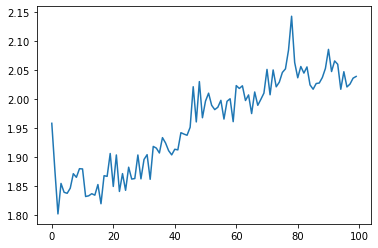

In [26]:
generations = 100

population = generate_population(size=30,constraint=constraint)
best_obj = []
i = 1
while True:
        print(f"GENERATION-{i}")
        for individual in population:
            print(individual, objective_function(individual))


        best_obj.append(objective_function(sort_population_by_fitness(population)[-1]))
        if i == generations:
            break

        i += 1

        population = make_next_generation(population)

best_individual = sort_population_by_fitness(population)[-1]
print("\nFINAL RESULT")
print(best_individual, objective_function(best_individual))
plt.plot(best_obj)

NameError: name 'population' is not defined

In [ ]:
# 🔬 FINAL RESULT
# {'x1': 0.5341399621814105, 'x2': 0.28564688780911446, 'x3': 0.2307875138518814} 1.7457117215167421
# {'x1': 0.686242503795166, 'x2': 0.38413578257780084, 'x3': 0.27748833605012035} 1.9749560531812733

In [ ]:
x,y,z = 0.6,0.4,0.326598
Objective_function({"x1":x,"x2":y,"x3":z}),constraint(x,y,z)

In [ ]:
constraint( 0.6550397261367304,  0.38677154233350175, 0.46761072420711414)

# Particle Swarm Optimization

In [ ]:
x_m*y_m

PSO found best solution at in 0 - f(3.3537454236338933)=189.94044484808182
PSO found best solution at in 1 - f(3.3537454236338933)=189.94044484808182
PSO found best solution at in 2 - f(3.0886421708370113)=189.44651553150473
PSO found best solution at in 3 - f(3.192863738342495)=189.33255468486595
PSO found best solution at in 4 - f(3.192863738342495)=189.33255468486595
PSO found best solution at in 5 - f(3.192863738342495)=189.33255468486595
PSO found best solution at in 6 - f(3.192863738342495)=189.33255468486595
PSO found best solution at in 7 - f(3.1856230216315677)=189.32711892876827
PSO found best solution at in 8 - f(3.163861783850729)=189.32259249113804
PSO found best solution at in 9 - f(3.163861783850729)=189.32259249113804
PSO found best solution at in 10 - f(3.163861783850729)=189.32259249113804
PSO found best solution at in 11 - f(3.1674122343372595)=189.32211462058345
PSO found best solution at in 12 - f(3.1674122343372595)=189.32211462058345
PSO found best solution at in

<ipython-input-14-b99eb635b8ed>:3: RuntimeWarning: divide by zero encountered in true_divide
  return 400/x + 2*np.pi*(x**2)


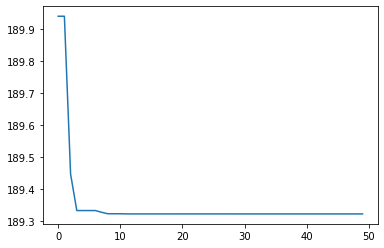

In [14]:
def f(x):
    "Objective function"
    return 400/x + 2*np.pi*(x**2)


x= np.linspace(0,20,100)
z = f(x)


# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8

# Create particles
n_particles = 20
np.random.seed(100)

# initialize position and velocity
X = np.random.rand(n_particles) * 5
V = np.random.randn(n_particles) * 0.1

# Initialize data
pbest = X.copy()
pbest_obj = f(X)
gbest = pbest[pbest_obj.argmin()]
gbest_obj = pbest_obj.min()


def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    
    
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest-X)
    X = X + V
    
    obj = f(X)
    pbest[(pbest_obj >= obj)] = X[(pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

g_bests = []
for i in range(50):
    update()
    print("PSO found best solution at in {} - f({})={}".format(i,gbest, gbest_obj))
    g_bests.append(gbest_obj)
plt.plot(g_bests)

# print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
# print("Global optimal at f({})={}".format([x_min], f(x_min)))

In [ ]:
pow(100/np.pi, 1/3)

In [ ]:
X = np.random.rand( n_particles) * 5
# p = X
# p[0,0] = 69
X
# X[0]

In [27]:
from functools import partial
import numpy as np

def _obj_wrapper(func, x):
    return func(x)

def _is_feasible_wrapper(func, x):
    return np.all(func(x)>=0)

def _cons_constraints_wrapper(constraints, x):
    return np.array(constraints(x))
    
def pso(func, lb, ub, constraints=None, swarmsize=100, 
         w1=0.8, c1=0.1, c2=0.1, maxiter=100):
    
    lb = np.array(lb)
    ub = np.array(ub)
   
    vhigh = np.abs(ub - lb)
    vlow = -vhigh

    # Initialize objective function
    obj = partial(_obj_wrapper, func)
    
    # Initialize constraint function(s)
    print('Single constraint function given in constraints')
    cons = partial(_cons_constraints_wrapper, constraints)
    is_feasible = partial(_is_feasible_wrapper, cons)
        
    # Initialize the particle swarm
    S = swarmsize
    D = len(lb)  # the number of dimensions each particle has
    x = np.random.rand(S, D)  # particle positions
    v = np.zeros_like(x)  # particle velocities
    p_best = np.zeros_like(x)  # best particle positions
    fx = np.zeros(S)  # current particle function values
    fs = np.zeros(S, dtype=bool)  # feasibility of each particle
    fp = np.ones(S)*np.inf  # best particle function values
    g = []  # best swarm position
    fg = np.inf  # best swarm position starting value
    
    # Initialize the particle's position
    x = lb + x*(ub - lb)

    # Calculate objective and constraints for each particle
    for i in range(S):
        fx[i] = obj(x[i, :])
        fs[i] = is_feasible(x[i, :])
       
    # Store particle's best position (if constraints are satisfied)
    i_update = np.logical_and((fx < fp), fs)
    p_best[i_update, :] = x[i_update, :].copy()
    fp[i_update] = fx[i_update]

    # Update swarm's best position
    i_min = np.argmin(fp)
    if fp[i_min] < fg:
        fg = fp[i_min]
        g = p_best[i_min, :].copy()
   
    # Initialize the particle's velocity
    v = vlow + np.random.rand(S, D)*(vhigh - vlow)
    
    best_objs = []
    
    # Iterate until termination criterion met
    it = 1
    while it <= maxiter:
        r1 = np.random.uniform(size=(S, D))
        r2 = np.random.uniform(size=(S, D))

        # Update the particles velocities
        v = w1*v + c1*r1*(p_best - x) + c2*r2*(g - x)
        
        # Update the particles' positions
        x = x + v
        
        # Correct for bound violations
        maskl = x < lb
        masku = x > ub
        x = x*(~np.logical_or(maskl, masku)) + lb*maskl + ub*masku

        # Update objectives and constraints
        for i in range(S):
            fx[i] = obj(x[i, :])
            fs[i] = is_feasible(x[i, :])

        # Store particle's best position (if constraints are satisfied)
        i_update = np.logical_and((fx < fp), fs)
        p_best[i_update, :] = x[i_update, :].copy()
        fp[i_update] = fx[i_update]

        # Compare swarm's best position with global best position
        i_min = np.argmin(fp)
        if fp[i_min] < fg:
            
            p_min = p_best[i_min, :].copy()
            stepsize = np.sqrt(np.sum((g - p_min)**2))
            
            g = p_min.copy()
            fg = fp[i_min]

        best_objs.append(fg)
        print('Best after iteration {:}: {:} {:}'.format(it, g, fg))
        it += 1

    print('Stopping search: maximum iterations reached --> {:}'.format(maxiter))
    plt.plot(best_objs)
    if not is_feasible(g):
        print("However, the optimization couldn't find a feasible design. Sorry")
    else:
        return g, fg

Single constraint function given in constraints
Best after iteration 1: [2.95068813 7.44706322] 192.77140217735777
Best after iteration 2: [2.95068813 7.44706322] 192.77140217735777
Best after iteration 3: [2.95068813 7.44706322] 192.77140217735777
Best after iteration 4: [2.95068813 7.44706322] 192.77140217735777
Best after iteration 5: [2.95068813 7.44706322] 192.77140217735777
Best after iteration 6: [2.95068813 7.44706322] 192.77140217735777
Best after iteration 7: [2.95068813 7.44706322] 192.77140217735777
Best after iteration 8: [2.95068813 7.44706322] 192.77140217735777
Best after iteration 9: [2.83161592 8.        ] 192.71142615782162
Best after iteration 10: [3.43202189 5.41540836] 190.7862470693131
Best after iteration 11: [3.43202189 5.41540836] 190.7862470693131
Best after iteration 12: [3.43202189 5.41540836] 190.7862470693131
Best after iteration 13: [3.43202189 5.41540836] 190.7862470693131
Best after iteration 14: [3.43202189 5.41540836] 190.7862470693131
Best after ite

(array([3.17259683, 6.32485255]), 189.3222864976958)

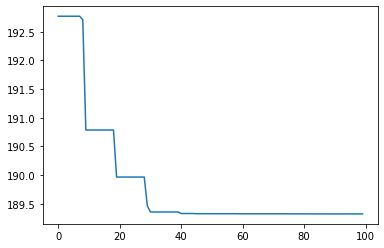

In [29]:
def objective_function(x):
    r = x[0]
    h = x[1]
    return 2*np.pi*(r**2) + 2*np.pi*r*h

def constraint(x):
    r = x[0]
    h = x[1]
    return [np.pi*(r**2)*h-200]

lb = [0, 0]
ub = [6, 8]

pso(objective_function, lb, ub, constraints=constraint,maxiter=100)

In [ ]:
(10**(2/3) )/ (np.pi**(1/3))

# Assignment 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import warnings

warnings.filterwarnings("ignore")


class AntColonyOptimizer:
    def __init__(self, ants, evaporation_rate, intensification, alpha=1.0, beta=0.0, beta_evaporation_rate=0,
                 choose_best=.1):
        """
        Ant colony optimizer.  Traverses a graph and finds either the max or min distance between nodes.
        :param ants: number of ants to traverse the graph
        :param evaporation_rate: rate at which pheromone evaporates
        :param intensification: constant added to the best path
        :param alpha: weighting of pheromone
        :param beta: weighting of heuristic (1/distance)
        :param beta_evaporation_rate: rate at which beta decays (optional)
        :param choose_best: probability to choose the best route
        """
        # Parameters
        self.ants = ants
        self.evaporation_rate = evaporation_rate
        self.pheromone_intensification = intensification
        self.heuristic_alpha = alpha
        self.heuristic_beta = beta
        self.beta_evaporation_rate = beta_evaporation_rate
        self.choose_best = choose_best

        # Internal representations
        self.pheromone_matrix = None
        self.heuristic_matrix = None
        self.probability_matrix = None

        self.map = None
        self.set_of_available_nodes = None

        # Internal stats
        self.best_series = []
        self.best = None
        self.fitted = False
        self.best_path = None
        self.fit_time = None

        # Plotting values
        self.stopped_early = False

    def __str__(self):
        string = "Ant Colony Optimizer"
        string += "\n--------------------"
        string += "\nDesigned to optimize either the minimum or maximum distance between nodes in a square matrix that behaves like a distance matrix."
        string += "\n--------------------"
        string += "\nNumber of ants:\t\t\t\t{}".format(self.ants)
        string += "\nEvaporation rate:\t\t\t{}".format(self.evaporation_rate)
        string += "\nIntensification factor:\t\t{}".format(self.pheromone_intensification)
        string += "\nAlpha Heuristic:\t\t\t{}".format(self.heuristic_alpha)
        string += "\nBeta Heuristic:\t\t\t\t{}".format(self.heuristic_beta)
        string += "\nBeta Evaporation Rate:\t\t{}".format(self.beta_evaporation_rate)
        string += "\nChoose Best Percentage:\t\t{}".format(self.choose_best)
        string += "\n--------------------"
        string += "\nUSAGE:"
        string += "\nNumber of ants influences how many paths are explored each iteration."
        string += "\nThe alpha and beta heuristics affect how much influence the pheromones or the distance heuristic weigh an ants' decisions."
        string += "\nBeta evaporation reduces the influence of the heuristic over time."
        string += "\nChoose best is a percentage of how often an ant will choose the best route over probabilistically choosing a route based on pheromones."
        string += "\n--------------------"
        if self.fitted:
            string += "\n\nThis optimizer has been fitted."
        else:
            string += "\n\nThis optimizer has NOT been fitted."
        return string

    def _initialize(self):
        """
        Initializes the model by creating the various matrices and generating the list of available nodes
        """
        assert self.map.shape[0] == self.map.shape[1], "Map is not a distance matrix!"
        num_nodes = self.map.shape[0]
        self.pheromone_matrix = np.ones((num_nodes, num_nodes))
        # Remove the diagonal since there is no pheromone from node i to itself
        self.pheromone_matrix[np.eye(num_nodes) == 1] = 0
        self.heuristic_matrix = 1 / self.map
        self.probability_matrix = (self.pheromone_matrix ** self.heuristic_alpha) * (
                self.heuristic_matrix ** self.heuristic_beta)  # element by element multiplcation
        self.set_of_available_nodes = list(range(num_nodes))

    def _reinstate_nodes(self):
        """
        Resets available nodes to all nodes for the next iteration
        """
        self.set_of_available_nodes = list(range(self.map.shape[0]))

    def _update_probabilities(self):
        """
        After evaporation and intensification, the probability matrix needs to be updated.  This function
        does that.
        """
        self.probability_matrix = (self.pheromone_matrix ** self.heuristic_alpha) * (
                self.heuristic_matrix ** self.heuristic_beta)

    def _choose_next_node(self, from_node):
        """
        Chooses the next node based on probabilities.  If p < p_choose_best, then the best path is chosen, otherwise
        it is selected from a probability distribution weighted by the pheromone.
        :param from_node: the node the ant is coming from
        :return: index of the node the ant is going to
        """
        numerator = self.probability_matrix[from_node, self.set_of_available_nodes]
        if np.random.random() < self.choose_best:
            next_node = np.argmax(numerator)
        else:
            denominator = np.sum(numerator)
            probabilities = numerator / denominator
            next_node = np.random.choice(range(len(probabilities)), p=probabilities)
        return next_node

    def _remove_node(self, node):
        self.set_of_available_nodes.remove(node)

    def _evaluate(self, paths, mode):
        """
        Evaluates the solutions of the ants by adding up the distances between nodes.
        :param paths: solutions from the ants
        :param mode: max or min
        :return: x and y coordinates of the best path as a tuple, the best path, and the best score
        """
        scores = np.zeros(len(paths))
        coordinates_i = []
        coordinates_j = []
        for index, path in enumerate(paths):
            score = 0
            coords_i = []
            coords_j = []
            for i in range(len(path) - 1):
                coords_i.append(path[i])
                coords_j.append(path[i + 1])
                score += self.map[path[i], path[i + 1]]
            scores[index] = score
            coordinates_i.append(coords_i)
            coordinates_j.append(coords_j)
        if mode == 'min':
            best = np.argmin(scores)
        elif mode == 'max':
            best = np.argmax(scores)
        return (coordinates_i[best], coordinates_j[best]), paths[best], scores[best]

    def _evaporation(self):
        """
        Evaporate some pheromone as the inverse of the evaporation rate.  Also evaporates beta if desired.
        """
        self.pheromone_matrix *= (1 - self.evaporation_rate)
        self.heuristic_beta *= (1 - self.beta_evaporation_rate)

    def _intensify(self, best_coords):
        """
        Increases the pheromone by some scalar for the best route.
        :param best_coords: x and y (i and j) coordinates of the best route
        """
        i = best_coords[0]
        j = best_coords[1]
        self.pheromone_matrix[i, j] += self.pheromone_intensification

    def fit(self, map_matrix, iterations=100, mode='min', early_stopping_count=20, verbose=True):
        """
        Fits the ACO to a specific map.  This was designed with the Traveling Salesman problem in mind.
        :param map_matrix: Distance matrix or some other matrix with similar properties
        :param iterations: number of iterations
        :param mode: whether to get the minimum path or maximum path
        :param early_stopping_count: how many iterations of the same score to make the algorithm stop early
        :return: the best score
        """
        if verbose: print("Beginning ACO Optimization with {} iterations...".format(iterations))
        self.map = map_matrix
        start = time.time()
        self._initialize()
        num_equal = 0

        for i in range(iterations):
            start_iter = time.time()
            paths = []
            path = []

            for ant in range(self.ants):
                current_node = self.set_of_available_nodes[np.random.randint(0, len(self.set_of_available_nodes))]
                start_node = current_node
                while True:
                    path.append(current_node)
                    self._remove_node(current_node)
                    if len(self.set_of_available_nodes) != 0:
                        current_node_index = self._choose_next_node(current_node)
                        current_node = self.set_of_available_nodes[current_node_index]
                    else:
                        break

                path.append(start_node)  # go back to start
                self._reinstate_nodes()
                paths.append(path)
                path = []

            best_path_coords, best_path, best_score = self._evaluate(paths, mode)

            if i == 0:
                best_score_so_far = best_score
            else:
                if mode == 'min':
                    if best_score < best_score_so_far:
                        best_score_so_far = best_score
                        self.best_path = best_path
                elif mode == 'max':
                    if best_score > best_score_so_far:
                        best_score_so_far = best_score
                        self.best_path = best_path

            if best_score == best_score_so_far:
                num_equal += 1
            else:
                num_equal = 0

            self.best_series.append(best_score)
            self._evaporation()
            self._intensify(best_path_coords)
            self._update_probabilities()

            if verbose: print("Best score at iteration {}: {}; overall: {} ({}s)"
                              "".format(i, round(best_score, 2), round(best_score_so_far, 2),
                                        round(time.time() - start_iter)))

            if best_score == best_score_so_far and num_equal == early_stopping_count:
                self.stopped_early = True
                print("Stopping early due to {} iterations of the same score.".format(early_stopping_count))
                break

        self.fit_time = round(time.time() - start)
        self.fitted = True

        if mode == 'min':
            self.best = self.best_series[np.argmin(self.best_series)]
            if verbose: print(
                "ACO fitted.  Runtime: {} minutes.  Best score: {}".format(self.fit_time // 60, self.best))
            return self.best
        elif mode == 'max':
            self.best = self.best_series[np.argmax(self.best_series)]
            if verbose: print(
                "ACO fitted.  Runtime: {} minutes.  Best score: {}".format(self.fit_time // 60, self.best))
            return self.best
        else:
            raise ValueError("Invalid mode!  Choose 'min' or 'max'.")

    def plot(self):
        """
        Plots the score over time after the model has been fitted.
        :return: None if the model isn't fitted yet
        """
        if not self.fitted:
            print("Ant Colony Optimizer not fitted!  There exists nothing to plot.")
            return None
        else:
            fig, ax = plt.subplots(figsize=(20, 15))
            ax.plot(self.best_series, label="Best Run")
            ax.set_xlabel("Iteration")
            ax.set_ylabel("Performance")
            ax.text(.8, .6,
                    'Ants: {}\nEvap Rate: {}\nIntensify: {}\nAlpha: {}\nBeta: {}\nBeta Evap: {}\nChoose Best: {}\n\nFit Time: {}m{}'.format(
                        self.ants, self.evaporation_rate, self.pheromone_intensification, self.heuristic_alpha,
                        self.heuristic_beta, self.beta_evaporation_rate, self.choose_best, self.fit_time // 60,
                        ["\nStopped Early!" if self.stopped_early else ""][0]),
                    bbox={'facecolor': 'gray', 'alpha': 0.8, 'pad': 10}, transform=ax.transAxes)
            ax.legend()
            plt.title("Ant Colony Optimization Results (best: {})".format(np.round(self.best, 2)))
            plt.show()

In [6]:

optimizer = AntColonyOptimizer(ants=10, evaporation_rate=.1, intensification=2, alpha=1, beta=1,
                               beta_evaporation_rate=0, choose_best=.1)
 
best = optimizer.fit(problem, 100)
optimizer.plot()

Beginning ACO Optimization with 100 iterations...


ValueError: probabilities contain NaN

Started : ACS
Ended : ACS
Sequence : <- 11 - 10 - 7 - 3 - 9 - 13 - 4 - 1 - 5 - 14 - 6 - 15 - 8 - 12 - 2 ->
Total distance travelled to complete the tour : 2275.83



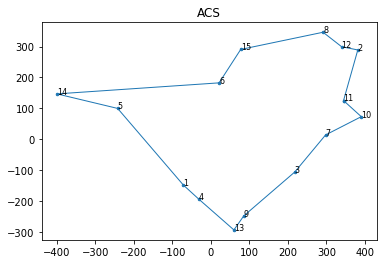

Started : Elitist
Ended : Elitist
Sequence : <- 9 - 13 - 4 - 1 - 14 - 5 - 6 - 15 - 8 - 12 - 2 - 11 - 10 - 7 - 3 ->
Total distance travelled to complete the tour : 2269.72



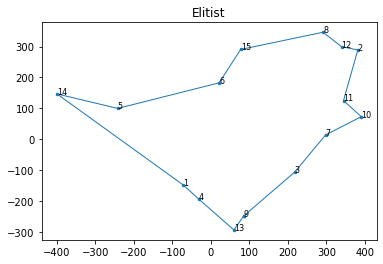

Started : MaxMin
Ended : MaxMin
Sequence : <- 5 - 6 - 15 - 8 - 12 - 2 - 11 - 10 - 7 - 3 - 9 - 13 - 4 - 1 - 14 ->
Total distance travelled to complete the tour : 2269.72



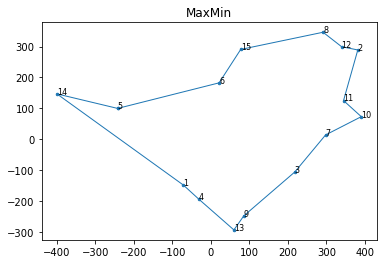

<Figure size 432x288 with 0 Axes>

In [7]:
import math
import random
from matplotlib import pyplot as plt


class SolveTSPUsingACO:
    class Edge:
        def __init__(self, a, b, weight, initial_pheromone):
            self.a = a
            self.b = b
            self.weight = weight
            self.pheromone = initial_pheromone

    class Ant:
        def __init__(self, alpha, beta, num_nodes, edges):
            self.alpha = alpha
            self.beta = beta
            self.num_nodes = num_nodes
            self.edges = edges
            self.tour = None
            self.distance = 0.0

        def _select_node(self):
            roulette_wheel = 0.0
            unvisited_nodes = [node for node in range(self.num_nodes) if node not in self.tour]
            heuristic_total = 0.0
            for unvisited_node in unvisited_nodes:
                heuristic_total += self.edges[self.tour[-1]][unvisited_node].weight
            for unvisited_node in unvisited_nodes:
                roulette_wheel += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * \
                                  pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
            random_value = random.uniform(0.0, roulette_wheel)
            wheel_position = 0.0
            for unvisited_node in unvisited_nodes:
                wheel_position += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * \
                                  pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
                if wheel_position >= random_value:
                    return unvisited_node

        def find_tour(self):
            self.tour = [random.randint(0, self.num_nodes - 1)]
            while len(self.tour) < self.num_nodes:
                self.tour.append(self._select_node())
            return self.tour

        def get_distance(self):
            self.distance = 0.0
            for i in range(self.num_nodes):
                self.distance += self.edges[self.tour[i]][self.tour[(i + 1) % self.num_nodes]].weight
            return self.distance

    def __init__(self, mode='ACS', colony_size=10, elitist_weight=1.0, min_scaling_factor=0.001, alpha=1.0, beta=3.0,
                 rho=0.1, pheromone_deposit_weight=1.0, initial_pheromone=1.0, steps=100, nodes=None, labels=None):
        self.mode = mode
        self.colony_size = colony_size
        self.elitist_weight = elitist_weight
        self.min_scaling_factor = min_scaling_factor
        self.rho = rho
        self.pheromone_deposit_weight = pheromone_deposit_weight
        self.steps = steps
        self.num_nodes = len(nodes)
        self.nodes = nodes
        if labels is not None:
            self.labels = labels
        else:
            self.labels = range(1, self.num_nodes + 1)
        self.edges = [[None] * self.num_nodes for _ in range(self.num_nodes)]
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                self.edges[i][j] = self.edges[j][i] = self.Edge(i, j, math.sqrt(
                    pow(self.nodes[i][0] - self.nodes[j][0], 2.0) + pow(self.nodes[i][1] - self.nodes[j][1], 2.0)),
                                                                initial_pheromone)
        self.ants = [self.Ant(alpha, beta, self.num_nodes, self.edges) for _ in range(self.colony_size)]
        self.global_best_tour = None
        self.global_best_distance = float("inf")

    def _add_pheromone(self, tour, distance, weight=1.0):
        pheromone_to_add = self.pheromone_deposit_weight / distance
        for i in range(self.num_nodes):
            self.edges[tour[i]][tour[(i + 1) % self.num_nodes]].pheromone += weight * pheromone_to_add

    def _acs(self):
        for step in range(self.steps):
            for ant in self.ants:
                self._add_pheromone(ant.find_tour(), ant.get_distance())
                if ant.distance < self.global_best_distance:
                    self.global_best_tour = ant.tour
                    self.global_best_distance = ant.distance
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)

    def _elitist(self):
        for step in range(self.steps):
            for ant in self.ants:
                self._add_pheromone(ant.find_tour(), ant.get_distance())
                if ant.distance < self.global_best_distance:
                    self.global_best_tour = ant.tour
                    self.global_best_distance = ant.distance
            self._add_pheromone(self.global_best_tour, self.global_best_distance, weight=self.elitist_weight)
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)

    def _max_min(self):
        for step in range(self.steps):
            iteration_best_tour = None
            iteration_best_distance = float("inf")
            for ant in self.ants:
                ant.find_tour()
                if ant.get_distance() < iteration_best_distance:
                    iteration_best_tour = ant.tour
                    iteration_best_distance = ant.distance
            if float(step + 1) / float(self.steps) <= 0.75:
                self._add_pheromone(iteration_best_tour, iteration_best_distance)
                max_pheromone = self.pheromone_deposit_weight / iteration_best_distance
            else:
                if iteration_best_distance < self.global_best_distance:
                    self.global_best_tour = iteration_best_tour
                    self.global_best_distance = iteration_best_distance
                self._add_pheromone(self.global_best_tour, self.global_best_distance)
                max_pheromone = self.pheromone_deposit_weight / self.global_best_distance
            min_pheromone = max_pheromone * self.min_scaling_factor
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)
                    if self.edges[i][j].pheromone > max_pheromone:
                        self.edges[i][j].pheromone = max_pheromone
                    elif self.edges[i][j].pheromone < min_pheromone:
                        self.edges[i][j].pheromone = min_pheromone

    def run(self):
        print('Started : {0}'.format(self.mode))
        if self.mode == 'ACS':
            self._acs()
        elif self.mode == 'Elitist':
            self._elitist()
        else:
            self._max_min()
        print('Ended : {0}'.format(self.mode))
        print('Sequence : <- {0} ->'.format(' - '.join(str(self.labels[i]) for i in self.global_best_tour)))
        print('Total distance travelled to complete the tour : {0}\n'.format(round(self.global_best_distance, 2)))

    def plot(self, line_width=1, point_radius=math.sqrt(2.0), annotation_size=8, dpi=120, save=True, name=None):
        x = [self.nodes[i][0] for i in self.global_best_tour]
        x.append(x[0])
        y = [self.nodes[i][1] for i in self.global_best_tour]
        y.append(y[0])
        plt.plot(x, y, linewidth=line_width)
        plt.scatter(x, y, s=math.pi * (point_radius ** 2.0))
        plt.title(self.mode)
        for i in self.global_best_tour:
            plt.annotate(self.labels[i], self.nodes[i], size=annotation_size)
        if save:
            if name is None:
                name = '{0}.png'.format(self.mode)
            plt.savefig(name, dpi=dpi)
        plt.show()
        plt.gcf().clear()


if __name__ == '__main__':
    _colony_size = 5
    _steps = 50
    _nodes = [(random.uniform(-400, 400), random.uniform(-400, 400)) for _ in range(0, 15)]
    acs = SolveTSPUsingACO(mode='ACS', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    acs.run()
    acs.plot()
    elitist = SolveTSPUsingACO(mode='Elitist', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    elitist.run()
    elitist.plot()
    max_min = SolveTSPUsingACO(mode='MaxMin', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    max_min.run()
    max_min.plot()

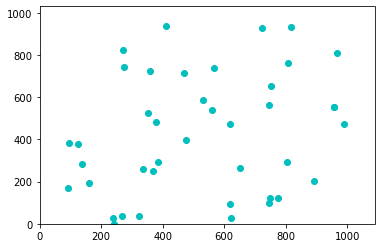

cost: 5319.67830346245, path: [25, 15, 2, 27, 16, 39, 21, 33, 34, 30, 8, 12, 29, 3, 17, 26, 14, 13, 19, 36, 37, 6, 18, 28, 23, 20, 5, 31, 4, 24, 11, 9, 0, 35, 38, 7, 22, 32, 1, 10, 25]


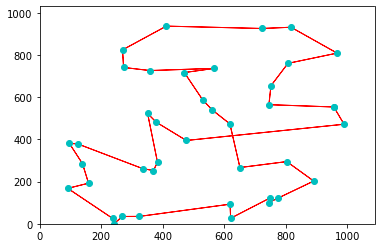

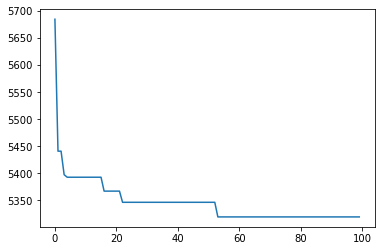

In [9]:
import random
import operator
import math
import matplotlib.pyplot as plt


class Graph(object):
    def __init__(self, cost_matrix: list, rank: int):
        """
        :param cost_matrix:
        :param rank: rank of the cost matrix
        """
        self.matrix = cost_matrix
        self.rank = rank
        self.pheromone = [[1 / (rank * rank) for j in range(rank)] for i in range(rank)]


class ACO(object):
    def __init__(self, ant_count: int, generations: int, alpha: float, beta: float, rho: float, q: int,
                 strategy: int):
        """
        :param ant_count:
        :param generations:
        :param alpha: relative importance of pheromone
        :param beta: relative importance of heuristic information
        :param rho: pheromone residual coefficient
        :param q: pheromone intensity
        :param strategy: pheromone update strategy. 0 - ant-cycle, 1 - ant-quality, 2 - ant-density
        """
        self.Q = q
        self.rho = rho
        self.beta = beta
        self.alpha = alpha
        self.ant_count = ant_count
        self.generations = generations
        self.update_strategy = strategy

    def _update_pheromone(self, graph: Graph, ants: list):
        for i, row in enumerate(graph.pheromone):
            for j, col in enumerate(row):
                graph.pheromone[i][j] *= self.rho
                for ant in ants:
                    graph.pheromone[i][j] += ant.pheromone_delta[i][j]

    def solve(self, graph: Graph):
        """
        :param graph:
        """
        best_cost = float('inf')
        best_solution = []
        bests = []
        for gen in range(self.generations):
            # noinspection PyUnusedLocal
            ants = [_Ant(self, graph) for i in range(self.ant_count)]
            for ant in ants:
                for i in range(graph.rank - 1):
                    ant._select_next()
                ant.total_cost += graph.matrix[ant.tabu[-1]][ant.tabu[0]]
                if ant.total_cost < best_cost:
                    best_cost = ant.total_cost
                    best_solution = [] + ant.tabu
                # update pheromone
                ant._update_pheromone_delta()
            self._update_pheromone(graph, ants)
            bests.append(best_cost)
#             print('generation #{}, best cost: {}, path: {}'.format(gen, best_cost, best_solution))
        best_solution.append(best_solution[0])
        return best_solution, best_cost,bests


class _Ant(object):
    def __init__(self, aco: ACO, graph: Graph):
        self.colony = aco
        self.graph = graph
        self.total_cost = 0.0
        self.tabu = []  # tabu list
        self.pheromone_delta = []  # the local increase of pheromone
        self.allowed = [i for i in range(graph.rank)]  # nodes which are allowed for the next selection
        self.eta = [[0 if i == j else 1 / graph.matrix[i][j] for j in range(graph.rank)] for i in
                    range(graph.rank)]  # heuristic information
        start = random.randint(0, graph.rank - 1)  # start from any node
        self.tabu.append(start)
        self.current = start
        self.allowed.remove(start)

    def _select_next(self):
        denominator = 0
        for i in self.allowed:
            denominator += self.graph.pheromone[self.current][i] ** self.colony.alpha * self.eta[self.current][
                                                                                            i] ** self.colony.beta
        probabilities = [0 for i in range(self.graph.rank)]  # probabilities for moving to a node in the next step
        for i in range(self.graph.rank):
            try:
                self.allowed.index(i)  # test if allowed list contains i
                probabilities[i] = self.graph.pheromone[self.current][i] ** self.colony.alpha * \
                    self.eta[self.current][i] ** self.colony.beta / denominator
            except ValueError:
                pass  # do nothing
            
        # select next node by probability roulette
        selected = 0
        rand = random.random()
        for i, probability in enumerate(probabilities):
            rand -= probability
            if rand <= 0:
                selected = i
                break
        self.allowed.remove(selected)
        self.tabu.append(selected)
        self.total_cost += self.graph.matrix[self.current][selected]
        self.current = selected

    # noinspection PyUnusedLocal
    def _update_pheromone_delta(self):
        self.pheromone_delta = [[0 for j in range(self.graph.rank)] for i in range(self.graph.rank)]
        for _ in range(1, len(self.tabu)):
            i = self.tabu[_ - 1]
            j = self.tabu[_]
            if self.colony.update_strategy == 1:  # ant-quality system
                self.pheromone_delta[i][j] = self.colony.Q
            elif self.colony.update_strategy == 2:  # ant-density system
                # noinspection PyTypeChecker
                self.pheromone_delta[i][j] = self.colony.Q / self.graph.matrix[i][j]
            else:  # ant-cycle system
                self.pheromone_delta[i][j] = self.colony.Q / self.total_cost

def plot(points, path: list,showPath = True):
    x = []
    y = []
    for point in points:
        x.append(point[0])
        y.append(point[1])
    y = list(map(operator.sub, [max(y) for i in range(len(points))], y))
    plt.plot(x, y, 'co')
    if showPath:
        for _ in range(1, len(path)):
            i = path[_ - 1]
            j = path[_]
            plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True) 

    plt.xlim(0, max(x) * 1.1)
    plt.ylim(0, max(y) * 1.1)
    plt.show()
    
def distance(city1: dict, city2: dict):
    return math.sqrt((city1['x'] - city2['x']) ** 2 + (city1['y'] - city2['y']) ** 2)

def create_cities(n_cities):
    cities = []
    points = []
    for i in range(n_cities):
        x = random.uniform(0, 1000)
        y = random.uniform(0, 1000)
        cities.append(dict(index=i+1, x=x, y=y))
        points.append((x,y))
    points.append(points[0])
    return cities,points

def main():
    
    cities,points = create_cities(40)
    plot(points,[],False)
    cost_matrix = []
    rank = len(cities)
    
    for i in range(rank):
        row = []
        for j in range(rank):
            row.append(distance(cities[i], cities[j]))
        cost_matrix.append(row)
    
    aco = ACO(10, 100, 1.0, 10.0, 0.5, 10, 1)
    graph = Graph(cost_matrix, rank)
    path, cost,bests = aco.solve(graph)
    print('cost: {}, path: {}'.format(cost, path))
    plot(points, path)
    plt.plot(bests)

main()